In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("C:/Users/Vikash Singh/Desktop/r and python/cab/train_cab.csv")
test=pd.read_csv("C:/Users/Vikash Singh/Desktop/r and python/cab/test.csv")

In [3]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [9]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [34]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [4]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [5]:
train.columns[train.isnull().any()]

Index(['fare_amount', 'passenger_count'], dtype='object')

In [6]:
train.iloc[:,:].isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [7]:
train=train.replace(0,np.nan)

### Changing data type

In [8]:
train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors='coerce')
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], errors='coerce')

### Data cleaning

In [9]:
#Changing the values to its absolute for easier calculation further
train = train[abs(train["pickup_latitude"]) < 90] #One value is 401 deleting that
train = train[abs(train["dropoff_latitude"]) < 90] #non greater than 90
train = train[abs(train["pickup_longitude"]) < 180]
train = train[abs(train["dropoff_longitude"]) < 180]

#Gtrain.shape #(16066, 7)

In [10]:
#Deleting pasangers count where count > 8, as a cab can max hold 8 passengers and i want to avoid outliers so deleting it not imputing
index_pc = train.loc[train.passenger_count > 8,:].index
train.drop(index_pc, axis = 0, inplace = True)

In [11]:
#deleting values greater than 100 or negative
index_fc = train.loc[train.fare_amount > 100,:].index
train.drop(index_fc, axis = 0, inplace = True)

index_fc1 = train.loc[train.fare_amount < 0, :].index
train.drop(index_fc1, axis = 0, inplace = True)

In [12]:
train = train.dropna(subset=['fare_amount'])
train = train.dropna(subset=['pickup_datetime'])

### Feature Engineering

In [13]:
train['abs_longi']=abs(train['pickup_longitude']-train['dropoff_longitude'])
train['abs_lat']=abs(train['pickup_latitude']-train['dropoff_latitude'])

In [14]:
#Calculatig distance from log and lati with great circle formula
def great_circle_distance(lon1,lat1,lon2,lat2):
    R = 6371000 # Approximate mean radius of earth (in m)
    
    # Convert decimal degrees to ridians
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Distance of lons and lats in radians
    dis_lon = lon2 - lon1
    dis_lat = lat2 - lat1
    
    # Haversine implementation
    a = np.sin(dis_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dis_lon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dis_m = R*c # Distance in meters
    dis_km = dis_m/1000 # Distance in km
    return dis_km
train['distance'] = great_circle_distance(train.pickup_longitude, train.pickup_latitude, train.dropoff_longitude, train.dropoff_latitude)
train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,1.999157
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0,0.028072,0.026603,3.787239
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0,0.006200,0.013180,1.555807
7,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0,0.038795,0.023090,4.155444
9,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0,0.010882,0.024265,2.849627
10,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1.0,0.015614,0.003583,1.374577


In [15]:
train = train[abs(train["pickup_latitude"]) < 90] #One value is 401 deleting that
train = train[abs(train["dropoff_latitude"]) < 90] #non greater than 90
train = train[abs(train["pickup_longitude"]) < 180]
train = train[abs(train["dropoff_longitude"]) < 180]

In [16]:
train['year']=train['pickup_datetime'].dt.year
train['month']=train['pickup_datetime'].dt.month
train['weekday']=train['pickup_datetime'].dt.weekday
train['hour']=train['pickup_datetime'].dt.hour

In [17]:
train=train.drop('pickup_datetime',axis=1)

In [18]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance,year,month,weekday,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,1.030764,2009,6,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,8.450134,2010,1,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,1.389525,2011,8,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,2.799270,2012,4,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,1.999157,2010,3,1,7


###  Missing value imputation

In [19]:
train.fillna(train.median(),inplace=True)

In [20]:
train.iloc[:,:].isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
abs_longi            0
abs_lat              0
distance             0
year                 0
month                0
weekday              0
hour                 0
dtype: int64

### Insights of data

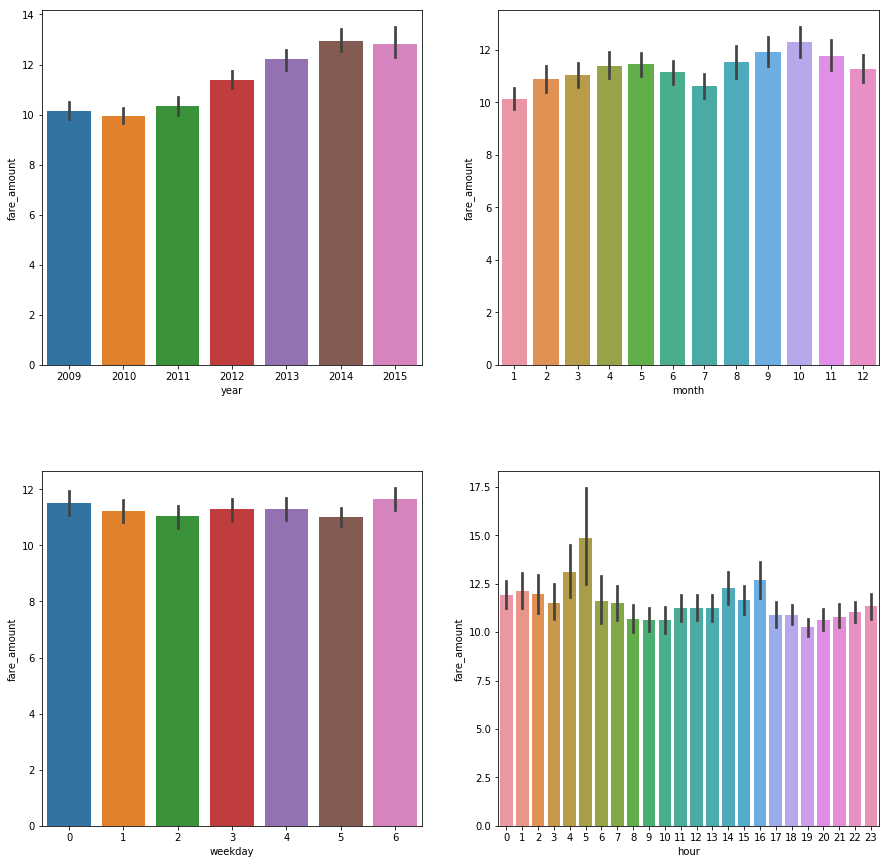

In [21]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)
sns.barplot(x='year',y='fare_amount',data=train,ax=axarr[0][0])
sns.barplot(x='month',y='fare_amount',data=train,ax=axarr[0][1])
sns.barplot(x='weekday',y='fare_amount',data=train,ax=axarr[1][0])
sns.barplot(x='hour',y='fare_amount',data=train,ax=axarr[1][1])

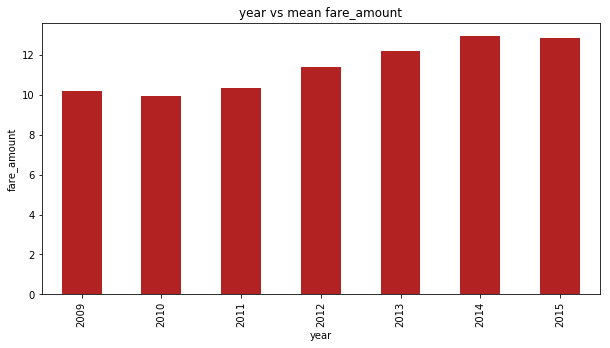

In [22]:
#Grouping mean fare_amount by year to check for any relationship in a bar plot
year = pd.pivot_table(train, values = 'fare_amount', index = 'year', aggfunc = ['mean'])
fig, ax = plt.subplots(figsize = (10,5))
year.plot(kind = 'bar', legend = False, color = 'firebrick', ax = ax)
ax.set(title = 'year vs mean fare_amount', ylabel= 'fare_amount')
plt.show()

### Corelation analysis

Text(0.5, 1.0, 'Pearson Correlation')

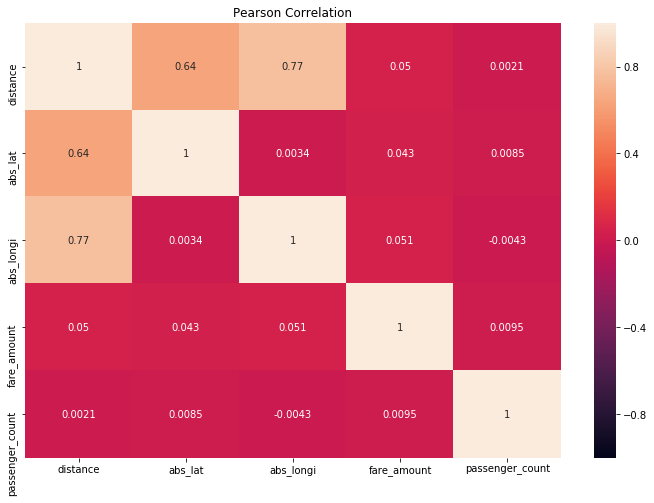

In [23]:
plt.figure(figsize=(12,8))
colname = ['distance','abs_lat','abs_longi','fare_amount','passenger_count']
heat_map = train[colname]
sns.heatmap(heat_map.corr(), vmin=-1.00, vmax=1.00, annot=True)

plt.title('Pearson Correlation')

In [24]:
#considering taxi ride is limited to certain distance will keep this at 100Km
train = train[train["distance"] < 100]
train = train[train["distance"] > 0]

#Droping the 66.00839 from abs_longi and 39.99361 from abs_lat which is not contributing much but just a noice, which i understood from my visualization
train['abs_longi'] = train['abs_longi'].replace(66.00839, np.nan)
train['abs_lat'] = train['abs_lat'].replace(39.99361, np.nan)

train = train.dropna(subset=['abs_longi'])
train = train.dropna(subset=['abs_lat'])

Text(0, 0.5, 'Importance')

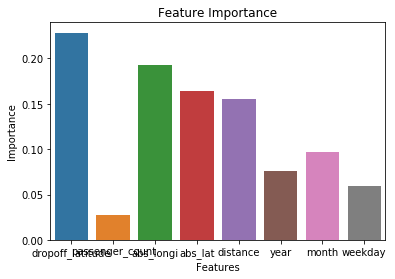

In [25]:
#Feature importance plotting
from sklearn.ensemble import RandomForestRegressor

names=list(train)
names = names[4:12]

fea = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(train.iloc[:,4:12],train.iloc[:,12])

sns.barplot(x = names ,y = fea.feature_importances_)  

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

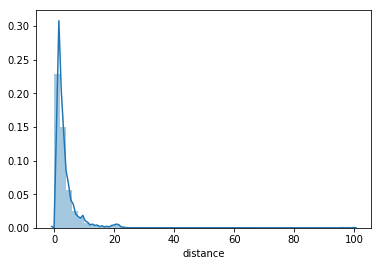

In [26]:
sns.distplot(train.distance)

In [27]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_longi,abs_lat,distance,year,month,weekday,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,0.009041,1.030764,2009,6,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,8.450134,2010,1,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,0.008504,0.010708,1.389525,2011,8,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,0.004437,0.024949,2.799270,2012,4,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,1.999157,2010,3,1,7


### Modelling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(train.iloc[:,1:13],train['fare_amount'],random_state=100,test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([11.20501207,  9.68238997, 11.83544244, ...,  6.26490409,
        7.19020048,  9.96899434])

In [31]:
def mape(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [32]:
print ("Training Score : " , lr.score(X_train, y_train))
print ("Validation Score : ", lr.score(X_test, y_test))
print ("Cross Validation Score : " , cross_val_score(lr, X_train, y_train, cv=5).mean())
print ("R2_Score : ", r2_score(lr_pred, y_test))
print("MAPE output: %f" % mape(y_test,lr_pred))

Training Score :  0.6472025390345464
Validation Score :  0.7865179102507799
Cross Validation Score :  0.16434432814410044
R2_Score :  0.5990073558559537
MAPE output: 25.527851


In [40]:
#using decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [42]:
fit=DecisionTreeRegressor(max_depth=6,max_leaf_nodes=10,min_impurity_decrease=0.5,criterion='mse',min_samples_leaf=1,splitter='best').fit(X_train,y_train)

In [43]:
prediction_dt=fit.predict(X_test)

In [44]:
r2_score_dt=r2_score(y_test,prediction_dt)
print("Dicision tree results:\n")
print("R2_score: %f"%r2_score_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, prediction_dt))
print("Rmse: %f"%rmse_dt)
print("\nMAPE results:")
mape(y_test,prediction_dt)

Dicision tree results:

R2_score: 0.817938
Rmse: 4.168312

MAPE results:


24.5420814196481

In [33]:
#using support vector regressor
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
svr_p = svr.predict(X_test)


score_svr = r2_score(y_test, svr_p)
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_p))

print("R^2_Score SVR: %f" % score_svr)
print("RMSE SVR: %f" % rmse_svr)
print("MAPE output: %f" % mape(y_test,svr_p))

R^2_Score SVR: 0.838356
RMSE SVR: 3.927638
MAPE output: 16.293515


### Predict the values of test data

In [47]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], errors='coerce')
test = test.dropna(subset=['pickup_datetime'])

In [49]:
test['year']=test['pickup_datetime'].dt.year
test['month']=test['pickup_datetime'].dt.month
test['weekday']=test['pickup_datetime'].dt.weekday
test['hour']=test['pickup_datetime'].dt.hour

In [50]:
test['abs_longi']=abs(test['pickup_longitude']-test['dropoff_longitude'])
test['abs_lat']=abs(test['pickup_latitude']-test['dropoff_latitude'])

In [51]:
test['distance'] = great_circle_distance(test.pickup_longitude, test.pickup_latitude, test.dropoff_longitude, test.dropoff_latitude)

In [52]:
test = test.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'], axis=1)

In [53]:
test.head()

,passenger_count,year,month,weekday,hour,abs_longi,abs_lat,distance
0,1,2015,1,1,13,0.008110,0.019970,2.323259
1,1,2015,1,1,13,0.012024,0.019817,2.425353
2,1,2011,10,5,11,0.002870,0.005121,0.618628
3,1,2012,12,5,21,0.009288,0.016172,1.961033
4,1,2012,12,5,21,0.022519,0.045348,5.387301


In [57]:
svr_t=SVR().fit(train.iloc[:,4:12],train.iloc[:,12])

C:\Users\Vikash Singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
svr_t

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
svr_t_pred=svr_t.predict(test)

In [61]:
test['Amount']=svr_t_pred

In [62]:
test.head()

,passenger_count,year,month,weekday,hour,abs_longi,abs_lat,distance,Amount
0,1,2015,1,1,13,0.008110,0.019970,2.323259,13.530573
1,1,2015,1,1,13,0.012024,0.019817,2.425353,13.530573
2,1,2011,10,5,11,0.002870,0.005121,0.618628,13.530573
3,1,2012,12,5,21,0.009288,0.016172,1.961033,13.530573
4,1,2012,12,5,21,0.022519,0.045348,5.387301,13.530573


In [63]:
test.to_csv("Amount_Predicted.csv")

### Visualisation

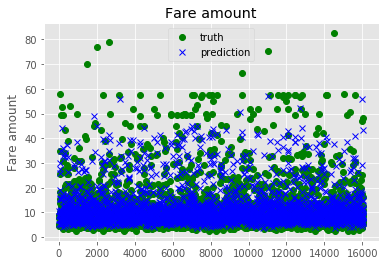

In [73]:
predict_lg = lg.predict(X_test)
predictions1 = pd.Series(predict_lg, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='truth')
plt.plot(predictions1,'bx', label='prediction')

plt.title('Fare amount')

plt.ylabel('Fare amount')

plt.legend(loc='best')

plt.show()

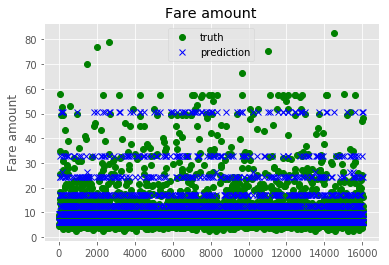

In [74]:
predict_dt = fit.predict(X_test)
predictions = pd.Series(predict_dt, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='truth')
plt.plot(predictions,'bx', label='prediction')

plt.title('Fare amount')

plt.ylabel('Fare amount')

plt.legend(loc='best')

plt.show()

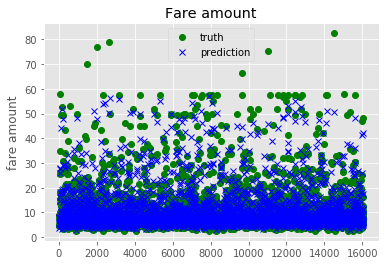

In [72]:
predict_svr = svr.predict(X_test)
predictions2 = pd.Series(predict_svr, index = y_test.index.values)

plt.style.use('ggplot')
plt.figure(1)

plt.plot(y_test,'go', label='truth')
plt.plot(predictions2,'bx', label='prediction')

plt.title('Fare amount')

plt.ylabel('fare amount')

plt.legend(loc='best')

plt.show()